In [1]:
import numpy as np
import pandas as pd

In [6]:
# cargar dataset
# dataset link: https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv
dataset_path = "/home/david/ML_DL/datasets/Novel Corona Virus 2019/covid_19_data.csv"
df = pd.read_csv(dataset_path)

In [7]:
df.sample(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
230805,230806,02/20/2021,NaN,Nepal,2021-04-02 15:13:53,273351.0,2061.0,269755.0
21690,21691,05/04/2020,NaN,Tunisia,2020-05-05 02:32:34,1018.0,43.0,406.0
102701,102702,09/03/2020,Unknown,UK,2021-04-02 15:13:53,0.0,0.0,0.0
78340,78341,08/02/2020,Aysen,Chile,2021-04-02 15:13:53,83.0,1.0,71.0
237415,237416,02/28/2021,Rhode Island,US,2021-04-02 15:13:53,125622.0,2502.0,0.0


In [8]:
# cambiar el tipo de dato de la columna de ObservationDate
df["ObservationDate"] = pd.to_datetime(df["ObservationDate"])
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
# elegir solo algunas columnas
df.drop(labels=["SNo", "Province/State", "Last Update"], axis=1, inplace=True)
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
306424,2021-05-29,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Ukraine,87550.0,1738.0,83790.0


In [11]:
# ver los datos por día
df_time = df.groupby("ObservationDate").sum()
df_time.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0


In [24]:
df_time.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0
2021-05-28,169470725.0,3523117.0,106633069.0
2021-05-29,169951560.0,3533619.0,107140669.0


**Obtener algunas muestras arbitrarias**

In [12]:
df1 = df_time["Confirmed"].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [13]:
df2 = df_time["Deaths"].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [14]:
# cuántas personas van sobreviviendo
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [15]:
# deltas por cada día
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [16]:
# ver el promedio por columna
df_time.diff().mean()

Confirmed    344728.200811
Deaths         7167.549696
Recovered    217323.811359
dtype: float64

In [17]:
df_diff = df_time.diff()

In [18]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 557.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 30.0}}

In [21]:
df_diff.fillna(
    {
        'Confirmed': 557.0,
        'Deaths': 17.0,
        'Recovered': 30.0
    }, 
    inplace=True
)

In [22]:
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [25]:
# obtener el dataframe original
df_diff.cumsum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [26]:
# hacer remuestreo por cada 7 días
df_diff.resample("7D").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,5578.0,131.0,108.0
2020-01-29,18314.0,361.0,749.0
2020-02-05,20911.0,621.0,3827.0
2020-02-12,30335.0,894.0,9668.0
2020-02-19,5277.0,701.0,13553.0
...,...,...,...
2021-04-28,5642661.0,92528.0,4666430.0
2021-05-05,5331241.0,89658.0,4838711.0
2021-05-12,4541037.0,86840.0,4800529.0


In [27]:
# por cada mes
df_diff.resample("M").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,225.0
2020-02-29,76087.0,2728.0,39556.0
2020-03-31,771462.0,39242.0,138226.0
2020-04-30,2401731.0,192394.0,837095.0
2020-05-31,2910561.0,138242.0,1626127.0
2020-06-30,4319842.0,138411.0,2711439.0
2020-07-31,7127806.0,168508.0,5019965.0
2020-08-31,7909780.0,171272.0,6449484.0
2020-09-30,8504867.0,163907.0,6847448.0


### Variables nulas

**Interpolar cuando hay valores no definidos**

In [30]:
# df_diff.resample("12h").mean() # genera NaNs
df_diff.resample("12h").sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,540.0,17.0,30.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,-156.0,-8.0,-21.0
...,...,...,...
2021-05-27 00:00:00,554368.0,12753.0,697358.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,499934.0,11820.0,554963.0


In [33]:
df_acc = df_time.resample("12h").sum(min_count=1)
df_acc

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,NaN,NaN,NaN
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [34]:
# completar los valores nulos, con el valor previo o el anterior
df_acc.bfill()
# df_acc.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1097.0,34.0,60.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,941.0,26.0,39.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169470725.0,3523117.0,106633069.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [36]:
# definir el valor que queramos
df_acc.fillna(1)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,1.0,1.0,1.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1.0,1.0,1.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,1.0,1.0,1.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [38]:
# o con interporlación
df_acc.interpolate(inplace=True)

In [39]:
# tasa de supervivencia
df_acc["rate"] = 1 - df_acc["Deaths"] / df_acc["Confirmed"]
df_acc

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211


**Cuando la variable tipo tiempo no pertenece al índice, cómo manejarlo**

In [40]:
df_acc = df_acc.reset_index()
df_acc

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,557.0,17.0,30.0,0.969479
1,2020-01-22 12:00:00,827.0,25.5,45.0,0.969166
2,2020-01-23 00:00:00,1097.0,34.0,60.0,0.969006
3,2020-01-23 12:00:00,1019.0,30.0,49.5,0.970559
4,2020-01-24 00:00:00,941.0,26.0,39.0,0.972370
...,...,...,...,...,...
982,2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0,0.979220
983,2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5,0.979215
984,2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0,0.979211
985,2021-05-28 12:00:00,169711142.5,3528368.0,106886869.0,0.979210


In [41]:
df_acc.groupby(pd.Grouper(key="ObservationDate", freq="M"))[["rate"]].mean()

,rate
ObservationDate,
2020-01-31,0.974241
2020-02-29,0.973562
2020-03-31,0.960046
2020-04-30,0.935326
2020-05-31,0.933192
2020-06-30,0.945718
2020-07-31,0.957081
2020-08-31,0.964339
2020-09-30,0.968524


<AxesSubplot:xlabel='ObservationDate'>

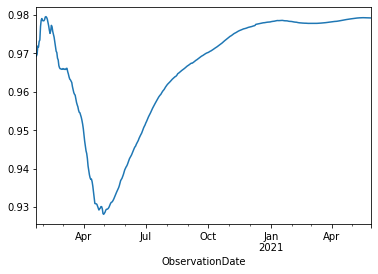

In [43]:
# graficarlo
data_ser = df_acc.groupby(pd.Grouper(key="ObservationDate", freq="1D"))["rate"].mean()
data_ser.plot()

<AxesSubplot:xlabel='ObservationDate'>

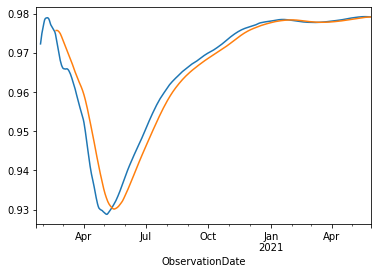

In [46]:
# ver la misma gráfica pero tomando ventanas de tiempo de 7 días
data_ser.rolling(window=7).mean().plot()
data_ser.rolling(window=30).mean().plot()